In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, pyarrow as pa
import os, re, chardet, xlrd
from IPython.display import display, HTML, Markdown
from openpyxl import load_workbook

##### Toggle pandas limit

In [2]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

### Batch Import
The below will get the sheet names of the master Excel file as a list, and create a second list of dataframes generated from each sheet.  Then, it will pickle (.pkl) each dataframe with a filename based on the corresponding sheet, and save them to be quickly accessed later.

In [3]:
def get_sheetnames_xlsx(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    return wb.sheetnames

sheetnames = get_sheetnames_xlsx('Vision/Vision Data Master Copy.xlsx')

dfs = []

## This section takes a long time to run, uncomment when needed.
for sheet in sheetnames:
    dfs.append(pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name=sheet))
    
df_names = ['AR', 'CL', 'EMProjectAssoc', 'LD', 'LedgerAP', 'LedgerAR', 'LedgerMisc', 'Opportunity',
            'OpportunityCustomTabFields', 'PR', 'Projects_BillingProjections', 
            'Projects_ProjectSetup']

In [4]:
# # single import for minor correction
# df_CL = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='CL')
# df_Opportunity = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='Opportunity')
# df_PR = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='PR')
df_LedgerMisc = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='LedgerMisc')
df_LedgerEX = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='LedgerEX')
df_LedgerAP = pd.read_excel('Vision/Vision Data Master Copy.xlsx', sheet_name='LedgerAP')

In [ ]:
for i, df in enumerate(dfs):
    columns = df.columns
    print(f"{df_names[i]} has columns: {columns}")

In [5]:
df_LedgerAP.dropna(axis=1, how='all', inplace=True)

In [6]:
nullseries = df_LedgerAP.isnull().sum()
print(nullseries[nullseries > 0])

WBS1                     233782
WBS2                     233786
WBS3                     256435
SubType                  186290
Desc1                     42034
Desc2                     32192
BillStatus               354038
BankCode                 232297
Vendor                   151623
Voucher                  162486
BilledWBS1               517857
BilledWBS2               517857
BilledWBS3               517857
BilledInvoice            517871
XferWBS1                 558903
XferWBS2                 558903
XferWBS3                 558903
XferAccount              558903
TaxCode                  566662
ExchangeInfo             383934
ProjectExchangeInfo      436956
BillingExchangeInfo      436956
NonBill                  406941
TransferredBillStatus    565925
WBS_UniqueID             233783
dtype: int64


In [10]:
df_LedgerEX.dropna(axis=1, how='all', inplace=True)

In [11]:
nullseries = df_LedgerEX.isnull().sum()
print(nullseries[nullseries > 0])

WBS1                      18668
WBS2                      18682
WBS3                      43091
Org                        4993
SubType                  221079
Desc2                      7788
BillStatus               132323
BankCode                 136653
Employee                  24237
Voucher                   16536
BilledWBS1               189102
BilledWBS2               189102
BilledWBS3               189102
BilledInvoice            189102
XferWBS1                 228143
XferWBS2                 228145
XferWBS3                 228145
XferAccount              228143
TaxCode                  234245
ExchangeInfo             185458
ProjectExchangeInfo      152976
BillingExchangeInfo      152976
NonBill                  234220
TransferredBillStatus    233374
WBS_UniqueID              18668
dtype: int64


In [13]:
df_LedgerMisc.dropna(axis=1, how='all', inplace=True)

In [14]:
nullseries = df_LedgerMisc.isnull().sum()
print(nullseries[nullseries > 0])

WBS1                      66048
WBS2                      66053
WBS3                      90665
SubType                  344361
Desc1                     10643
Desc2                    126415
SuppressBill               1791
BillStatus               165337
BankCode                 320743
Employee                 345549
BilledWBS1               291422
BilledWBS2               291422
BilledWBS3               291880
BilledInvoice            295528
Unit                     344361
UnitTable                344361
XferWBS1                 354071
XferWBS2                 354071
XferWBS3                 354071
XferAccount              354071
ExchangeInfo             208568
ProjectExchangeInfo      175901
BillingExchangeInfo      166949
AutoEntryOrg             329387
AutoEntryAccount         329387
ModUser                  289151
AuthorizedBy             289151
NonBill                  354487
TransferredBillStatus    354409
EmOrg                    345549
WBS_UniqueID              66048
Period.2

In [19]:
df_LedgerMisc.drop('AutoEntryOrg', axis=1, inplace=True)
df_LedgerMisc.drop('AutoEntryAccount', axis=1, inplace=True)

In [6]:
# some basic data cleaning before pickling

In [4]:
df_AR = dfs[0]
# DueDate & LinkCompany are null, and RetainageDate only has 531 values, & is unlikely to be useful
df_AR.drop("DueDate", axis=1, inplace=True)
df_AR.drop("LinkCompany", axis=1, inplace=True)
df_AR.drop("RetainageDate", axis=1, inplace=True)

In [5]:
# possibly do some basic data cleaning before pickling
df_CL = dfs[1]

In [7]:
df_CL.dropna(axis=1, how='all', inplace=True)

In [8]:
df_CL.drop(axis=1, labels=["ParentID", "ParentLevel1", "ParentLevel2", "ParentLevel3",
                           "CustomCurrencyCode", "Type", "Specialty"], inplace=True)

In [11]:
df_CL[df_CL['Name'].isna()]

,ClientID,Client,Name,Status,ExportInd,WebSite,Memo,CurrentStatus,CreateUser,CreateDate,...,AlaskaNative,SpecialtyType,Employees,AnnualRevenue,GovernmentAgency,Competitor,EightA,Hubzone,Incumbent,AjeraSync
4667,"T: #f0f""",Prospect,NaN,2013-04-04 12:26:26,TCOCHERL,2013-04-09 12:31:36,Y,N,N,N,...,NaN,0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_CL.drop(4667, inplace=True)

In [17]:
# df_CL[4660:4670]

# index now has a gap. This will close it
df_CL.index = range(len(df_CL))

In [8]:
df_EMProjectAssoc = dfs[2]

In [15]:
df_EMProjectAssoc.dropna(axis=1, how='all', inplace=True)

In [16]:
df_EMProjectAssoc.isna().sum()

RecordID                0
WBS1                    0
WBS2                77608
WBS3               210541
Employee                0
Role               230545
RoleDescription    459414
TeamStatus          63887
StartDate          449994
EndDate            469395
CreateUser              0
CreateDate              0
ModUser              1082
ModDate                 0
CRMHours                0
dtype: int64

In [11]:
df_LD = dfs[3]

In [22]:
# Check null counts
null_counts = df_LD.isna().sum()
null_counts

Period                                     0
PostSeq                                    0
PKey                                       0
WBS1                                       0
WBS2                                      75
WBS3                                     108
LaborCode                                  0
Employee                                   0
TransType                                  0
TransDate                                  0
Name                                       0
RegHrs                                     0
OvtHrs                                     0
RegAmt                                     0
OvtAmt                                     0
BillExt                                    0
Rate                                       0
OvtPct                                     0
OvtRate                                    0
EmType                                     0
Pool                                       0
Category                                   0
EmOrg     

In [33]:
df_LD.drop(axis=1, labels=["TimekeeperEndDate"], inplace=True)

In [ ]:
df_LD.dropna(axis=1, how='all', inplace=True)

In [31]:
df_LD['TransferredBillStatus'].value_counts()

B    12474
H     3594
T        4
W        3
Name: TransferredBillStatus, dtype: int64

In [34]:
df_LD.shape

(1024657, 83)

In [35]:
df_LedgerAR = dfs[4]

In [37]:
df_LedgerAR.dropna(axis=1, how='all', inplace=True)

In [40]:
# Check null counts
null_counts = df_LedgerAR.isna().sum()
null_counts

Period                                    0
PostSeq                                   0
PKey                                      0
WBS1                                  32602
WBS2                                  32602
WBS3                                  32912
Account                                   0
Org                                       0
TransType                                 0
SubType                              161462
RefNo                                  4142
TransDate                                 0
Desc1                                 18964
Desc2                                  2252
Amount                                    0
CBAmount                                  0
BillExt                                   0
ProjectCost                               0
AutoEntry                                 0
SuppressBill                          47691
BillStatus                           215486
SkipGL                                    0
BankCode                        

In [54]:
# B - To be billed, W - To be written off, H - Held, F - Final billed, 
# X - Written off, T - Transferred, I - Inserted, M - Modified, 
# D - To be deleted, N - Not billable, O - Deleted, R - Partial hold/Released.
df_LedgerAR["BillStatus"].value_counts()

B    3232
F     361
T      60
W      32
M       5
X       4
O       1
Name: BillStatus, dtype: int64

In [57]:
df_LedgerAR.drop(axis=1, labels=["ExchangeInfo", "TaxCode", "XferAccount", "TransferredBillStatus",
                           "CreditMemoRefNo", "BillingExchangeInfo", "ProjectExchangeInfo",
                           "SubType"], inplace=True)

In [59]:
df_LedgerAR.shape

(219181, 64)

In [64]:
df_Opportunity = dfs[5]

In [65]:
df_Opportunity.dropna(axis=1, how='all', inplace=True)

In [67]:
df_Opportunity.isna().sum()

OpportunityID             0
Opportunity            8921
Name                      0
Address1               5873
Address2               8716
Address3               8880
City                     16
State                   803
Zip                    6409
Country                2808
OpportunityType           0
Stage                     2
Description            2886
EstStartDate             39
EstCompletionDate        41
EstFees                   4
EstConstructionCost       4
Revenue                   6
Probability               6
WeightedRevenue           4
CloseDate               987
ClientID                377
ContactID              1130
PRWBS1                 5846
OpenDate                  4
Source                 5096
Org                       8
Status                    4
PRProposalWBS1         1172
ProjMgr                1742
Principal              1606
Supervisor               40
PublicNoticeDate       8921
SolicitationNum        8921
CustomCurrencyCode     8921
County              

In [89]:
df_Opportunity["PRProposalWBS1"].value_counts()

0                  4
P05.2014.000922    1
P01.2014.008118    1
P05.2009.000496    1
P05.2014.000907    1
                  ..
P10.2019.000307    1
P01.2022.009942    1
P10.2020.000352    1
P05.2018.001200    1
P01.2010.006511    1
Name: PRProposalWBS1, Length: 7750, dtype: int64

In [97]:
df_Opportunity.drop(axis=1, labels=["ProposalManager", "OurRole", "NAICS", "CompetitionType", 
                                    "ContractTypeGovCon", "Duration", "AwardType", "ClosedNotes",
                                    "ClosedReason", "CustomCurrencyCode", "SolicitationNum",
                                    "PublicNoticeDate", "Source", "Opportunity"], inplace=True)

In [98]:
df_Opportunity.shape

(8925, 46)

In [99]:
df_OpportunityCustomTabFields = dfs[6]

In [100]:
df_OpportunityCustomTabFields.dropna(axis=1, how='all', inplace=True)

In [117]:
df_OpportunityCustomTabFields.isna().sum()

OpportunityID                        0
custClientType                      43
custReasonLost                    6848
custOpportunityProposalManager       4
custProposalDueDate                 76
custLostto                        8392
custReasonforNoGo                 8632
CustMarketSegment                 1855
CustSource                        2029
CreateUser                        4288
CreateDate                        4288
ModUser                           3252
ModDate                           3252
custINPUTEstimatedValue              0
CustFederalOpportunity               0
CustRateSchedule                  5944
CustNPPOpportunity                   0
dtype: int64

In [111]:
df_PR = dfs[7]

In [112]:
df_PR.dropna(axis=1, how='all', inplace=True)

In [118]:
# Check null counts
null_counts = df_PR.isna().sum()
null_counts

WBS1                                    0
WBS2                                15623
WBS3                                38777
Name                                  932
ChargeType                              3
SubLevel                                3
Principal                            2960
ProjMgr                              4029
Supervisor                          21621
ClientID                               51
CLAddress                             428
Fee                                     0
ReimbAllow                              0
ConsultFee                              0
BudOHRate                               0
Status                                  1
RevType                                 1
MultAmt                                 0
Org                                     5
UnitTable                           49417
StartDate                            9381
EndDate                             79366
PctComp                                 1
LabPctComp                        

In [142]:
df_PR['ProjectCurrencyCode'].value_counts()

2019-01-04 13:15:55    2
2023-08-07 15:13:11    1
Name: ProjectCurrencyCode, dtype: int64

In [143]:
df_PR.drop(axis=1, labels=["AwardType", "Duration", "ContractTypeGovCon", "MasterContract",
                           "Biller", "PlanID", "BillingCurrencyCode", "Locale", "LineItemApproval",
                           "LineItemApprovalEK", "BudgetSource", "BudgetLevel", "ConstComplDate",
                           "ProjectCurrencyCode"], inplace=True)

In [144]:
df_PR.shape

(80668, 162)

In [149]:
df_Projects_BillingProjections = dfs[8]

In [150]:
df_Projects_BillingProjections.isna().sum()

WBS1                    0
WBS2                   26
WBS3                   44
Seq                     0
custEstBillingDate     79
custEstGrossBilling     0
custEstSubs             0
custEstExpense          0
custEstNetFees          0
CreateUser             24
CreateDate             24
ModUser                24
ModDate                24
dtype: int64

In [151]:
df_Projects_BillingProjections.shape

(107, 13)

In [153]:
df_Projects_ProjectSetup = dfs[9]

In [ ]:
df_Projects_ProjectSetup.dropna(axis=1, how='all', inplace=True)

In [158]:
df_Projects_ProjectSetup.isna().sum()

WBS1                              0
WBS2                          20109
WBS3                          83086
Seq                               0
custPhaseNamePMF               1460
custDeptIDPMF                  3694
custBillTypePMF                5777
custPhaseFeePMF                   0
custEstStartDatePMF           11974
custEstComplDatePMF           12369
custTaskFeePMF                    0
custInsuranceInfoPMF           6121
custStructureTypeSF330PMF      6807
custTaskNamePMF                4809
custNonStdRatesPMF                0
custGovernmentRatesPMF       274856
custPhaseNoPMF                 1342
custTaskNoPMF                  5631
custSIN                      275809
CreateUser                   111744
CreateDate                   111744
ModUser                      111283
ModDate                      111283
CustStdRatesYear             265531
CustNAICSCode                324552
CustContract                 300416
dtype: int64

In [165]:
df_Projects_ProjectSetup.shape

(327192, 26)

### Pickle (export to .pkl)

In [167]:
# This section takes a long time to run, uncomment when needed.
for i, df in enumerate(dfs):
    working_filename = 'Vision\\PKL\\' + str(df_names[i]) + '.pkl'
    df.to_pickle(working_filename)

In [21]:
# # # single pickle for minor corrections
# # df_CL.to_pickle('Vision/PKL/CL.pkl')
# df_LedgerAP.to_pickle('Vision/PKL/LedgerAP.pkl')
# df_LedgerEX.to_pickle('Vision/PKL/LedgerEX.pkl')
# df_LedgerMisc.to_pickle('Vision/PKL/LedgerMisc.pkl')

### Re-Import from pickles
The below will read in all .pkl files in the directory as dataframes with a name equal to 'df_' + the filename.

In [3]:
# Get a list of all files in the folder
all_files = os.listdir('Vision/PKL/')
# Filter the list to include only CSV files
pkl_files = [file for file in all_files if file.endswith('.pkl')]
# make a list of full paths
file_path_list = ['Vision/PKL/' + file for file in pkl_files]

# pretty sure this wasn't serving any purpose

# # Extract the filenames and full paths
# full_paths = [os.path.abspath(os.path.join('Vision/', file)) for file in pkl_files]
names = [name.strip('.pkl') for name in pkl_files]

# Pair names with file paths using zip
dflist = list(zip(names, file_path_list))

# Create dataframes from all with matching names
for name, df in dflist:
    exec(f"df_{name} = pd.read_pickle(df)")

In [4]:
# # single import for minor corrections
# df_CL = pd.read_pickle('Vision/PKL/CL.pkl')

### Basic EDA

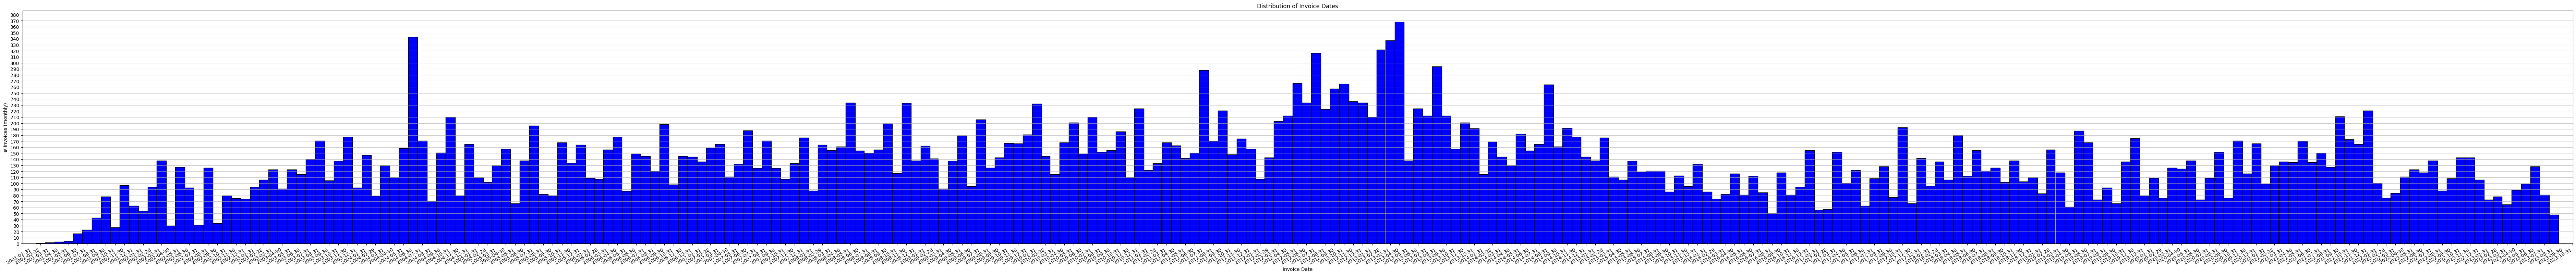

In [5]:
start_date = pd.to_datetime('2001-01-01')
end_date = pd.to_datetime('2023-11-01')
plot_range = df_AR['InvoiceDate'][(df_AR['InvoiceDate'] > start_date) & (df_AR['InvoiceDate'] < end_date)]
num_bins = pd.date_range(start=start_date, end=end_date, freq='M')

# Create a histogram
plt.figure(figsize=(96, 10))
plt.hist(plot_range , bins=num_bins, color='blue', edgecolor='black', align='right')

# Set labels and title
plt.xlabel('Invoice Date')
plt.ylabel('# Invoices (monthly)')
plt.title('Distribution of Invoice Dates')

# Set x-axis ticks to number of bins & y-ticks to steps of ten for the range of the data
plt.xticks(num_bins, rotation=45, ha='left')
plt.yticks(np.arange(0, 381, step=10))
# Format x-axis as dates
plt.gcf().autofmt_xdate()
# Set x-axis limits to desired range
plt.xlim(start_date, end_date)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Show the plot
plt.show()

#### Chart: All Invoices, by Date
- Potentially useful to establish periodicity
- Want to refine to income by month
- Want to compare to # proposals perhaps

Problems with the above: doesn't seem to be aligning bins correctly with dates, may not be binning by month as intended, xticks should be appearing at the end of each month bin, start and end are blank for some reason

In [6]:
# establishing overall range
plot_range.sort_values()

34116   2001-01-22
34165   2001-01-31
34176   2001-02-28
34110   2001-03-27
34111   2001-03-31
28384   2001-04-09
28187   2001-04-27
34179   2001-05-22
34071   2001-05-24
34082   2001-05-24
28188   2001-05-25
34183   2001-05-31
34026   2001-05-31
34157   2001-06-19
34072   2001-06-20
34170   2001-06-26
34154   2001-06-27
34115   2001-06-28
34198   2001-06-28
34019   2001-06-28
34075   2001-06-28
34277   2001-06-28
28209   2001-06-29
34063   2001-06-29
28221   2001-06-29
28202   2001-06-29
28234   2001-06-29
28215   2001-06-29
34027   2001-06-30
28203   2001-07-10
34028   2001-07-10
28210   2001-07-10
28235   2001-07-10
28222   2001-07-10
28216   2001-07-10
34291   2001-07-11
34290   2001-07-11
34180   2001-07-13
28236   2001-07-16
28223   2001-07-16
28204   2001-07-16
28217   2001-07-16
28211   2001-07-16
34158   2001-07-19
34050   2001-07-19
34068   2001-07-21
34171   2001-07-23
14466   2001-07-27
14463   2001-07-27
14443   2001-07-27
34076   2001-07-30
34190   2001-07-31
34085   2001

In [7]:
df_AR['InvoiceDate'].max()

Timestamp('2030-03-31 00:00:00')

In [8]:
df_LD.head()

,Period,PostSeq,PKey,WBS1,WBS2,WBS3,LaborCode,Employee,TransType,TransDate,Name,RegHrs,OvtHrs,RegAmt,OvtAmt,BillExt,Rate,OvtPct,OvtRate,EmType,Pool,Category,EmOrg,PrOrg,ChargeType,RateType,DebitLedgerMiscPKey,CreditLedgerMiscPKey,SuppressBill,BillStatus,Comment,BilledWBS1,BilledWBS2,BilledWBS3,BilledInvoice,BilledPeriod,XferWBS1,XferWBS2,XferWBS3,XferLaborCode,ProjectCost,SpecialOvtHrs,SpecialOvtAmt,SpecialOvtPct,SpecialOvtRate,SelPeriod,SelPostSeq,Payrate,PayOvtPct,PaySpecialOvtPct,SelOvtPeriod,SelOvtPostSeq,WrittenOffPeriod,RegAmtProjectCurrency,OvtAmtProjectCurrency,SpecialOvtAmtProjectCurrency,RateProjectCurrency,OvtRateProjectCurrency,SpecialOvtRateProjectCurrency,ProjectExchangeInfo,RegAmtBillingCurrency,OvtAmtBillingCurrency,SpecialOvtAmtBillingCurrency,RateBillingCurrency,OvtRateBillingCurrency,SpecialOvtRateBillingCurrency,BillingExchangeInfo,RegAmtEmployeeCurrency,OvtAmtEmployeeCurrency,SpecialOvtAmtEmployeeCurrency,RateEmployeeCurrency,OvtRateEmployeeCurrency,SpecialOvtRateEmployeeCurrency,ExchangeInfo,XferCategory,CostRateTableUsed,RealizationAmountEmployeeCurrency,RealizationAmountProjectCurrency,RealizationAmountBillingCurrency,NonBill,TransferredPeriod,TransferredBillStatus,TLProcessed
0,201305,74,422454704603,OHD.BMOP.000COR,GENERAL,ADMIN,OFFIC,83,TS,2013-05-13,"O'Brien, Kevin",9.0,0.0,431.82,0.0,441.0,47.98,0.0,0.0,E,0,110,00-COR,00-COR,H,S,422454704365,422454704331,N,B,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Y,0,0,0,0,-1,-1,0,0,0,-1,-1,0,431.82,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,431.82,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,431.82,0.0,0,47.98,0.0,0,<parms><ExchgRate>1</ExchgRate><OvrDateUsed>N<...,0,N,0.0,0.0,0.0,NaN,0,NaN,N
1,201305,74,422454704604,OHD.BMOP.000COR,GENERAL,ADMIN,OFFIC,83,TS,2013-05-14,"O'Brien, Kevin",10.0,0.0,479.80,0.0,490.0,47.98,0.0,0.0,E,0,110,00-COR,00-COR,H,S,422454704365,422454704331,N,B,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Y,0,0,0,0,-1,-1,0,0,0,-1,-1,0,479.80,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,479.80,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,479.80,0.0,0,47.98,0.0,0,<parms><ExchgRate>1</ExchgRate><OvrDateUsed>N<...,0,N,0.0,0.0,0.0,NaN,0,NaN,N
2,201305,74,422454704605,OHD.BMOP.000COR,GENERAL,ADMIN,OFFIC,83,TS,2013-05-15,"O'Brien, Kevin",8.5,0.0,407.83,0.0,416.5,47.98,0.0,0.0,E,0,110,00-COR,00-COR,H,S,422454704365,422454704331,N,B,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Y,0,0,0,0,-1,-1,0,0,0,-1,-1,0,407.83,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,407.83,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,407.83,0.0,0,47.98,0.0,0,<parms><ExchgRate>1</ExchgRate><OvrDateUsed>N<...,0,N,0.0,0.0,0.0,NaN,0,NaN,N
3,201305,74,422454704606,OHD.BMOP.000COR,GENERAL,ADMIN,OFFIC,83,TS,2013-05-16,"O'Brien, Kevin",8.5,0.0,407.83,0.0,416.5,47.98,0.0,0.0,E,0,110,00-COR,00-COR,H,S,422454704365,422454704331,N,B,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Y,0,0,0,0,-1,-1,0,0,0,-1,-1,0,407.83,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,407.83,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,407.83,0.0,0,47.98,0.0,0,<parms><ExchgRate>1</ExchgRate><OvrDateUsed>N<...,0,N,0.0,0.0,0.0,NaN,0,NaN,N
4,201305,74,422454704607,OHD.BMOP.000COR,GENERAL,ADMIN,OFFIC,83,TS,2013-05-17,"O'Brien, Kevin",7.0,0.0,335.86,0.0,343.0,47.98,0.0,0.0,E,0,110,00-COR,00-COR,H,S,422454704365,422454704331,N,B,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Y,0,0,0,0,-1,-1,0,0,0,-1,-1,0,335.86,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,335.86,0.0,0,47.98,0.0,0,<parms><Memo>Direct from amount</Memo></parms>,335.86,0.0,0,47.98,0.0,0,<parms><ExchgRate>1</ExchgRate><OvrDateUsed>N<...,0,N,0.0,0.0,0.0,NaN,0,NaN,N


In [9]:
# make pd.series of all P## project codes, R## project codes, and OHD codes

ohd_codes = df_LD[df_LD['WBS1'].str.startswith('OHD')]['WBS1'].value_counts()
# 372095 OHD codes
r_codes = df_LD[df_LD['WBS1'].str.startswith('R')]['WBS1'].value_counts()
# 696996 R codes
p_codes = df_LD[df_LD['WBS1'].str.startswith('P')]['WBS1'].value_counts()
# 272768 P codes

In [42]:
r_codes

R01.2004.004094    17050
R05.2010.000550    12020
R05.2015.000986    11806
R05.2015.986001    10632
R05.2011.000700     5812
R01.2014.007977     5786
R01.2002.03300A     5529
R05.2016.001022     5520
R01.2009.006205     5186
R01.2002.003195     5126
R01.2021.009733     5124
R05.2020.001260     4928
R01.2017.008963     4397
R05.2006.000269     3716
R01.2000.002061     3666
R01.2006.004801     3523
R05.2004.000067     3311
R01.2007.005336     3235
R01.2014.008079     3074
R01.2013.007922     2827
R01.2013.007759     2756
R01.2007.005423     2543
R03.2009.000276     2453
R05.2015.000983     2383
R01.2002.003206     2366
R05.2014.000963     2303
R11.2020.000007     2289
R01.2020.009583     2221
R01.2012.007543     2094
R05.2021.001284     2062
R01.2005.004283     2038
R01.2011.715712     1967
R01.2008.005871     1935
R01.2011.715713     1882
R05.2015.986002     1864
R05.2007.000281     1807
R01.2018.009280     1757
R01.2008.005563     1721
R01.2018.009414     1712
R01.2001.002776     1661


In [43]:
# since NPS is a major client we'll use those for the test example
NPS_projects = df_PR[df_PR['ClientID'].isin(["NPS"])]

In [44]:
# this function (WIP, PROP version still needs fixing) totals labor hours by client
# it matches all WBS1 codes associated with the ClientID in the PR table
# then finds all entries in LD associated with that WBS1
# it can also take parameters to only find hours marked "N" for NonBill,
# and (will) match only WBS2 = PROP hours 
# (I think this last needs to do some more cross-table magic to work properly)
def get_totals(filter_value, df_PR, df_LD, mode='default'):
    # Filter rows where 'ClientID' matches the filter value
    filtered_df = df_PR[df_PR['ClientID'].isin([filter_value])]

    # Get unique values from the 'WBS1' column in the filtered DataFrame
    unique_values = filtered_df['WBS1'].unique()

    # Convert the unique values to a list
    unique_values_list = list(unique_values)

    # Initialize dictionaries to store totals
    reg_hours_totals = {}
    ovt_hours_totals = {}

    # Apply additional filters based on mode
    if mode == 'proposal':
        df_LD_filtered = df_LD[df_LD['WBS2'].str.startswith('PROP')]
    elif mode == 'billable':
        df_LD_filtered = df_LD[df_LD['NonBill'].isin([None, 'N'])]
    else:
        df_LD_filtered = df_LD

    # Initialize a list to store the result strings
    result_strings = []

    # Iterate over unique values and calculate totals
    for wbs1_code in unique_values_list:
        relevant_rows = df_LD_filtered[df_LD_filtered['WBS1'] == wbs1_code]
        reg_hours_total = relevant_rows['RegHrs'].sum()
        ovt_hours_total = relevant_rows['OvtHrs'].sum()
        result_string = f"WBS1 Code: {wbs1_code}, Regular Hours: {reg_hours_total}, Overtime Hours: {ovt_hours_total}"
        result_strings.append(result_string)

    return result_strings

In [45]:
# Example usage
result_strings = get_totals('NPS', df_PR, df_LD, mode='billable')
for result_string in result_strings:
    print(result_string)

WBS1 Code: P01.2004.004094, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2020.009651, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P03.2014.000739, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2010.000550, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2009.006392, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2015.008511, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2019.009528, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2020.009582, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P01.2020.009602, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2007.000315, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2009.000547, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2009.000567, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2009.000568, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2015.000986, Regular Hours: 0.0, Overtime Hours: 0.0
WBS1 Code: P05.2019.001223, Regular Hours: 0.0, 

In [46]:
#  SAMPLE CODE - make sure none are repeated in a list
# TEMP_clientIDcounts = df_CL['ClientID'].value_counts()
# TEMP_clientIDcounts[TEMP_clientIDcounts > 1]